In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ H = C_1 n_q^2 - C_2 \cos(\phi) +  C_3 \cos(2\phi)$$

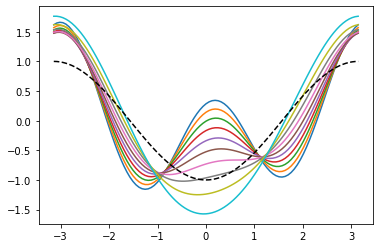

In [182]:
C1 = 0.05
C2 = 1
C3 = 1
phi0 = -0.1*np.pi

N = 101

phi = np.linspace(-np.pi,np.pi,N)

def V(phi,C3=C3):
    return -C2/(0.5+C3)*np.cos(phi) + C3*np.cos(2*phi+phi0)

fig, ax = plt.subplots()
for tmpC3 in np.arange(C3,0,-0.1):
    ax.plot(phi,V(phi,C3=tmpC3))

ax.plot(phi,-np.cos(phi),'k--')

$$ n_q \rightarrow -i\hbar \partial_\phi  \quad , \quad n_q^2 \rightarrow - \hbar^2 \partial_\phi^2$$

In [98]:
dphi = np.mean(phi[1:] - phi[:-1])

diff = (np.diag(np.ones(N-1),1) - np.diag(np.ones(N-1),-1))/2
# diff_periodic[((0,-1),(-1,0))] = 1
double_diff = (np.diag(-2*np.ones(N)) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1))
# double_diff_periodic[((0,-1),(-1,0))] = 1

Kinetic_energy = -C1/dphi**2*double_diff
Potential_energy = np.diag(V(phi))

In [99]:
H = Kinetic_energy + Potential_energy
eigvals, eigvecs = np.linalg.eigh(H)
eigvecs = eigvecs.T

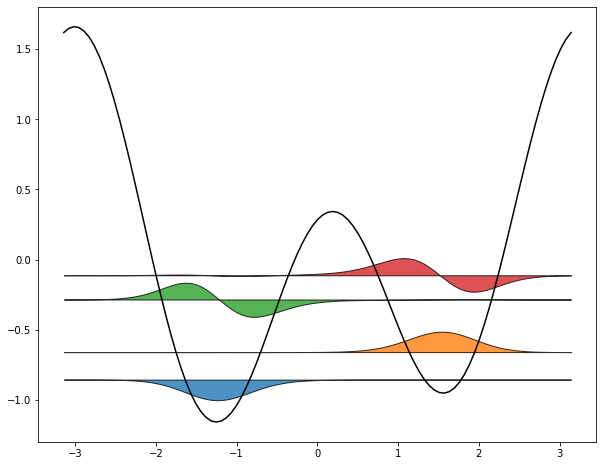

In [100]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(phi,V(phi),'k')
indices = [0,1,2,3]
for i in indices:
    ax.fill_between(phi,eigvecs[i]*10*C1+eigvals[i],[eigvals[i] for _ in phi],label='n=%d'%i,edgecolor='k',alpha=0.8)

# In torch language

In [127]:
phi = t.linspace(-np.pi,np.pi,N)

def V(phi,C3=C3):
    return -C2/(0.5+C3)*t.cos(phi) + C3*t.cos(2*phi+phi0)

double_diff = (t.diag(-2*t.ones(N)) + t.diag(t.ones(N-1),1) + t.diag(t.ones(N-1),-1))
Kinetic_energy = -C1/dphi**2*double_diff

def Trotter(C3_run,T=30):
    n = C3_run.shape[0]
    dt = T/n
    U = t.diag(t.ones(N)).type(t.complex128)
    for C3 in C3_run:
        H = (Kinetic_energy + t.diag(V(phi,C3))).type(t.complex128)
        U = t.matmul(t.matrix_exp(-1j*H*dt),U)
    return U

In [143]:
tmp = [100] \
+[10]
tmp

[100, 10]

In [156]:
start = C3
Nstart = 100
Nmid = 0
Nfinish = 100
finish = C3
C3_run = [(1-entry/Nstart)*start for entry in range(Nstart)] \
        + [0 for entry in range(Nmid)] \
        + [(entry/Nfinish)*finish for entry in range(Nfinish)] \
        + [finish for entry in range(40)]
C3_run = t.tensor(C3_run)

In [157]:
U = Trotter(C3_run)
eigvecs = t.tensor(eigvecs).type(t.complex128)

C:\Users\jv97\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


C:\Users\jv97\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:5297: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice
C:\Users\jv97\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


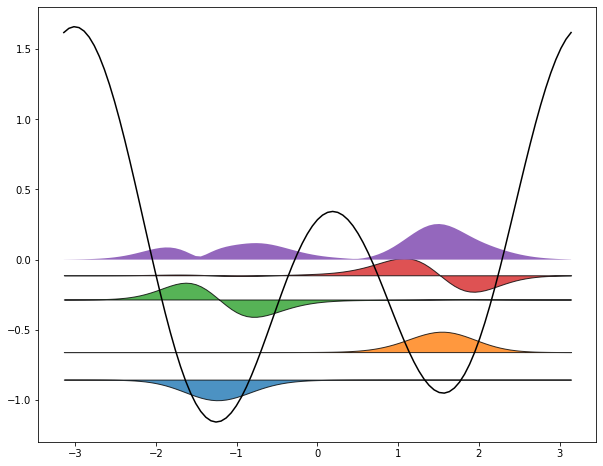

In [158]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(phi,V(phi),'k')
indices = [0,1,2,3]
for i in indices:
    ax.fill_between(phi,eigvecs[i]*10*C1+eigvals[i],eigvals[i],label='n=%d'%i,edgecolor='k',alpha=0.8)

ax.fill_between(phi,t.abs(U@eigvecs[0]),0)

In [177]:
summ = 0
for eigvec in eigvecs:
    summ += t.abs(eigvec.T@U@eigvecs[0])**2
summ

tensor(1.0000, dtype=torch.float64)

In [130]:
t.abs(eigvecs[0].T@U@eigvecs[0]),t.abs(eigvecs[2].T@U@eigvecs[0])

(tensor(0.7191, dtype=torch.float64), tensor(0.5008, dtype=torch.float64))

In [126]:
t.abs(eigvecs[0].T@eigvecs[0]),t.abs(eigvecs[2].T@eigvecs[0])

(tensor(1.0000, dtype=torch.float64), tensor(1.2847e-16, dtype=torch.float64))

$$
\phi \rightarrow -i\hbar \partial_{n_q}
\quad , \quad
\phi^2 \rightarrow - \hbar^2 \partial_{n_q}^2
$$

In [7]:
import torch as t

In [67]:
n_cutoff = N

nq = t.arange(-n_cutoff,n_cutoff + 1,1)

diff = (t.diag(t.ones(n_cutoff*2),1) - t.diag(t.ones(n_cutoff*2),-1))/2

term1 = C1*t.diag(nq**2)
term2 = -C2/2*(t.matrix_exp(diff) + t.matrix_exp(-diff))
term3 = C3/2*(t.matrix_exp(2*diff) + t.matrix_exp(-2*diff))

H = term1 + term2 + term3

In [68]:
eigvals, eigvecs = np.linalg.eigh(H.numpy())
eigvecs = eigvecs.T

In [69]:
eigvals

array([-7.92115152e-01, -7.91328788e-01, -4.65475023e-01, -4.52980608e-01,
       -1.81918293e-01, -1.01234287e-01,  4.43491340e-02,  2.80622900e-01,
        3.22690994e-01,  7.31037676e-01,  7.37757087e-01,  1.27543795e+00,
        1.27619290e+00,  1.92097795e+00,  1.92104566e+00,  2.66800737e+00,
        2.66801262e+00,  3.51599669e+00,  3.51599717e+00,  4.46457720e+00,
        4.46457720e+00,  5.51353741e+00,  5.51353741e+00,  6.66275167e+00,
        6.66275167e+00,  7.91214323e+00,  7.91214323e+00,  9.26166344e+00,
        9.26166344e+00,  1.07112761e+01,  1.07112761e+01,  1.22609615e+01,
        1.22609615e+01,  1.39107008e+01,  1.39107008e+01,  1.56604824e+01,
        1.56604824e+01,  1.75102978e+01,  1.75102978e+01,  1.94601402e+01,
        1.94601402e+01,  2.15100060e+01,  2.15100060e+01,  2.36598892e+01,
        2.36598892e+01,  2.59097862e+01,  2.59097862e+01,  2.82596970e+01,
        2.82596970e+01,  3.07096176e+01,  3.07096176e+01,  3.32595482e+01,
        3.32595482e+01,  

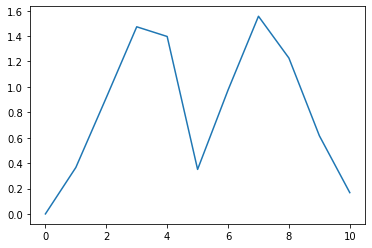

In [64]:
fig, ax = plt.subplots()

ax.plot(np.abs(np.fft.rfft(eigvecs[3])))
